___


# <font color= #90546f> **Proyecto Taller de Modelado de Datos** </font>
- <Strong> `ESTEBAN GÓMEZ, AISSA GONZALEZ Y SARAH BELTRAN` </Strong>
- <Strong> Año </Strong>: 2024
___



## <font color= #90546f> **Proyecto Regresión** </font>
#### <font color= #90546f> California Housing Sklearn Dataset </font>


Fuente del Dataset:
Scikitlearn California Housing[Dataset]. Sklearn Repository https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html 




## <font color= ##28af2e> Definición del problema </font>




### <font color= ##28af2e> Introducción </font>

<p style="text-align: justify;">
El California Housing Prices Dataset contiene información sobre viviendas en California, como la ubicación, número de habitaciones, población, ingresos de los hogares y la proximidad al océano. El objetivo principal es predecir el valor medio de una vivienda en diferentes áreas geográficas.
</p>

### <font color= ##28af2e> Objetivo </font>

<p style="text-align: justify;">
El objetivo del proyecto es predecir el valor medio de las viviendas en diferentes áreas de California utilizando características socioeconómicas y geográficas como los ingresos de los hogares, número de habitaciones, población y proximidad al océano. Esta predicción permitirá identificar patrones que expliquen la variabilidad de los precios inmobiliarios, facilitando la toma de decisiones en múltiples sectores. 

Esto nos puede servir en la vida cotidiana si se busca el precio de una vivienda específica en California, esto con el fin de buscar un aproximado de cuanto debería valer alguna propiedad y de cuanto se dispone para comprar o rentar alguna vivienda con características específicas.
</p>

### <font color= ##28af2e> Features </font>


1. Longitude: medida de qué tan al oeste está una casa; un valor más alto está más al oeste.

2. Latitude: medida de qué tan al norte está una casa; un valor más alto está más al norte.

3. Housing MedianAge: Edad media de una casa dentro de una manzana; un número más bajo es un edificio más nuevo.

4. Total Rooms: número total de habitaciones dentro de un bloque.

5. Total Bedrooms: Número total de dormitorios dentro de un bloque.

6. Population: Número total de personas que residen dentro de una cuadra.

7. Households: número total de hogares, un grupo de personas que residen dentro de una unidad residencial, para un bloque.

8. Median income: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares estadounidenses).

9. Median House Value: valor medio de la vivienda para hogares dentro de un bloque (medido en dólares estadounidenses). (Nuestra variable a predecir)

10. Ocean Proximity: Ubicación de la casa frente al océano o mar.


## <font color= ##28af2e> Entrega 1: Exploración de datos (EDA) </font>
___ 

### <font color= ##28af2e>Carga de Dataset y Librerias</font>

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [424]:
df = pd.read_csv(r"C:\Users\esteb\OneDrive\Documents\GitHub\Modelado_datos_Valerio\Proyecto\Datos\california_housing.csv")

### <font color= ##28af2e>Exploración de datos</font>

In [425]:
#Dimension de los datos
df.shape

(20640, 10)

In [426]:
# Primeros 5 renglones de la base de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [427]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

De nuestra única variable categórica sacamos la cantidad de veces en que cada respuesta se repite y a continuación creamos una gráfica con el fin de conocer la frecuencia de cada opción.

<Axes: >

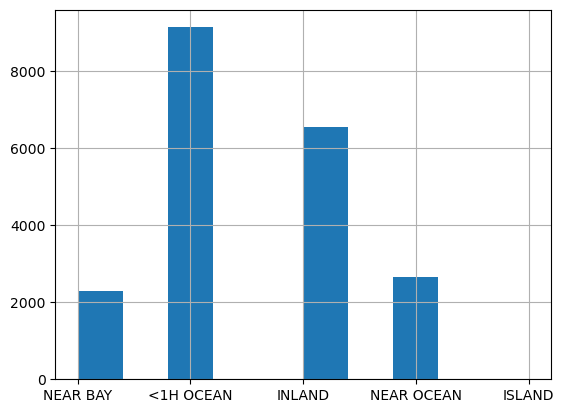

In [428]:
df['ocean_proximity'].hist()

La variable categórica la convertimos en unas nuevas columnas cada una con un "1" cuando es verdad y un "0" cuando no lo es, por ejemplo si en un registro aparece un "1" en INLAND, quiere decir que ese registro se encuentra en tierra.

In [429]:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.rename(columns={'ocean_proximity_<1H OCEAN': '<1H_OCEAN'}, inplace = True)
df.rename(columns={'ocean_proximity_INLAND': 'INLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_ISLAND': 'ISLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR BAY': 'NEAR_BAY'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR OCEAN': 'NEAR_OCEAN'}, inplace = True)

df[['<1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'ISLAND', 'INLAND']] = df[['<1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'ISLAND', 'INLAND']].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


A continuación se observa una descripción breve del dataset

In [430]:
# Descripción de los datos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [431]:
#Visualizar todo junto
def reporte(datos):
    dtypes = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    uniques = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    max = pd.DataFrame(datos.max(), columns=['Max'])
    min = pd.DataFrame(datos.min(), columns=['Min'])
    return dtypes.join(missing).join(uniques).join(max).join(min)

reporte(df)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
longitude,float64,0,844,-114.3100,-124.3500
latitude,float64,0,862,41.9500,32.5400
housing_median_age,int64,0,52,52.0000,1.0000
total_rooms,int64,0,5926,39320.0000,2.0000
total_bedrooms,float64,207,1923,6445.0000,1.0000
population,int64,0,3888,35682.0000,3.0000
households,int64,0,1815,6082.0000,1.0000
median_income,float64,0,12928,15.0001,0.4999
median_house_value,int64,0,3842,500001.0000,14999.0000
<1H_OCEAN,int32,0,2,1.0000,0.0000


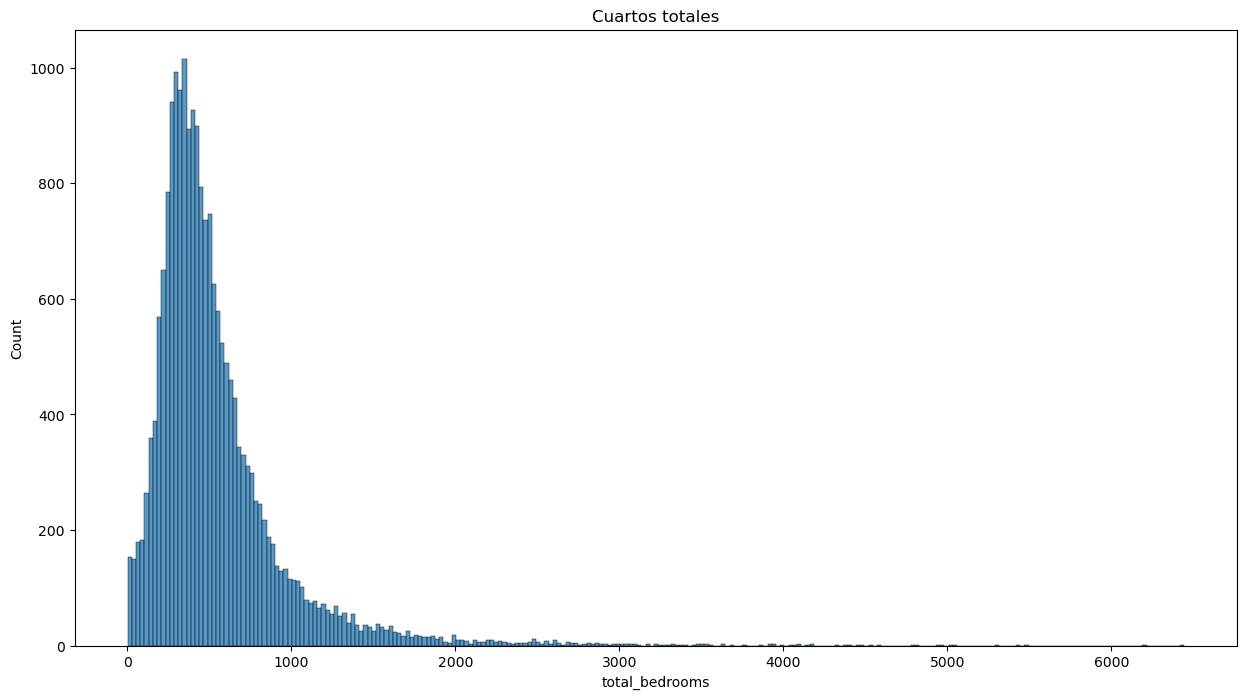

In [432]:
# Eliminación de los nulos
plt.figure(figsize = (15, 8))  
sns.histplot(data = df.total_bedrooms)
plt.title('Cuartos totales')
plt.show()

Eliminamos los nulos ya que son muy pocos los nulos comparados al total de los registros

In [433]:
df = df.dropna(subset = ['total_bedrooms'])

In [434]:
df['total_bedrooms'].isna().sum()

0

### <font color= ##28af2e>Valores atípicos</font>

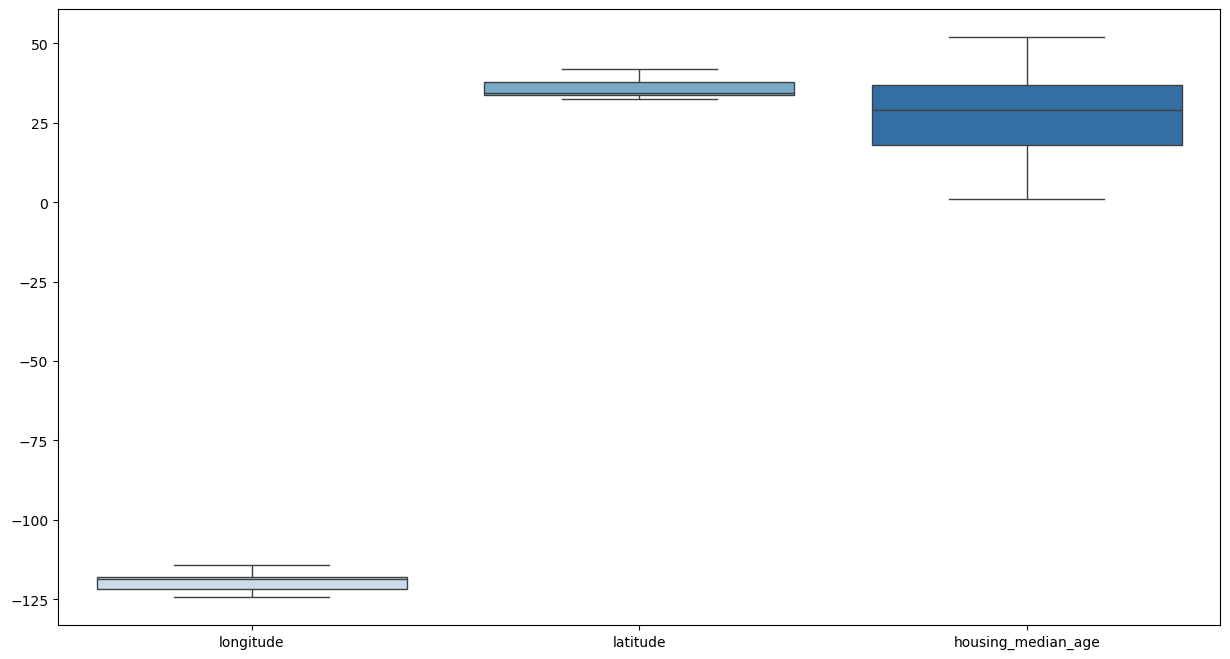

In [435]:
# Boxplot de nuestros features
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['longitude', 'latitude', 'housing_median_age']], palette="Blues")
plt.show()

Podemos observar que a partir de la longitud, la latitud y la edad media de la casa, los demás features tienen un gran número de valores atípicos, lo cual hace sentido ya que los costos en California son extremadamente variados.

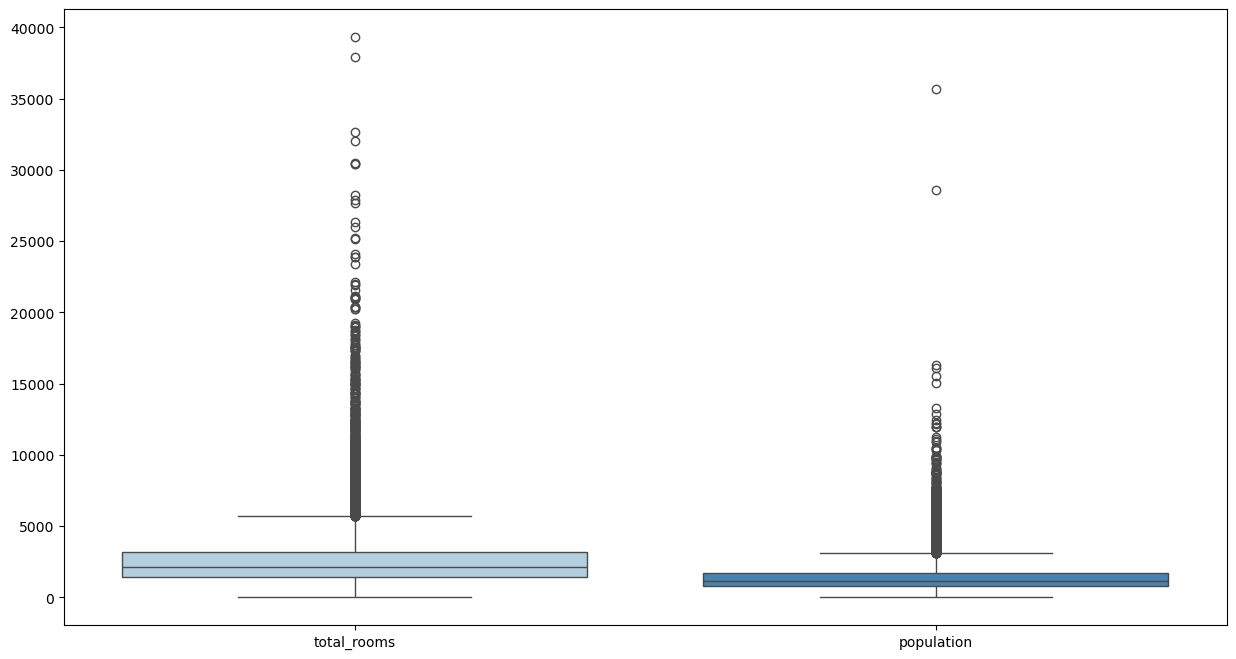

In [436]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['total_rooms', 'population']], palette="Blues")
plt.show()

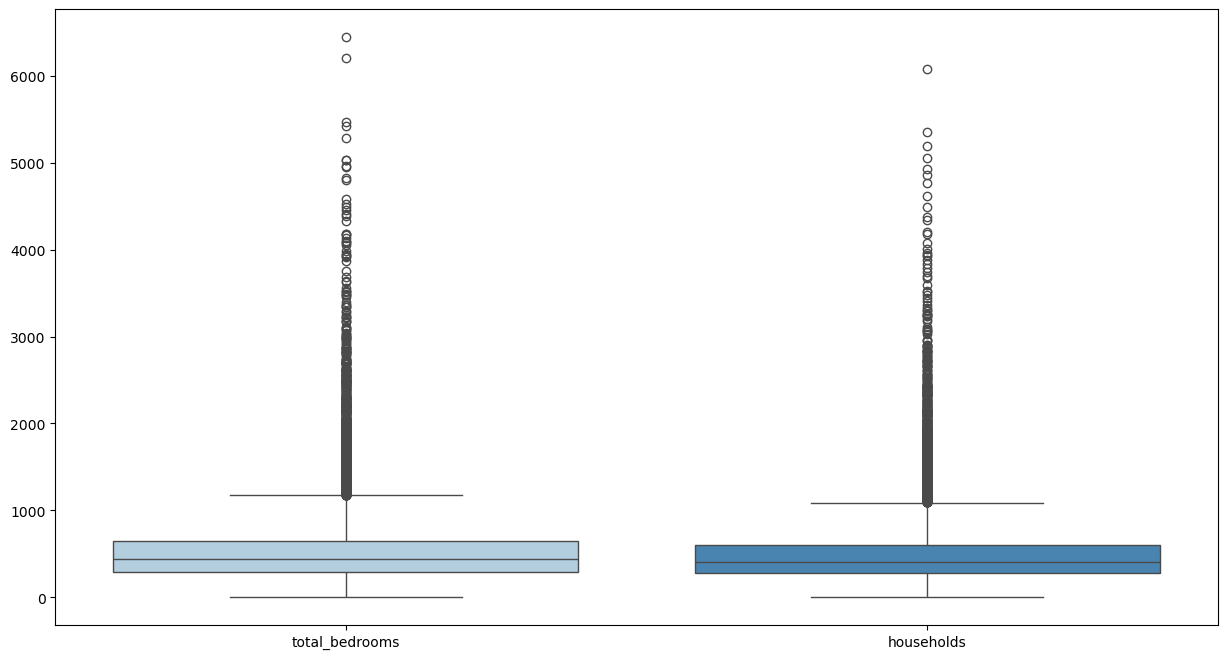

In [437]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['total_bedrooms', 'households']], palette="Blues")
plt.show()

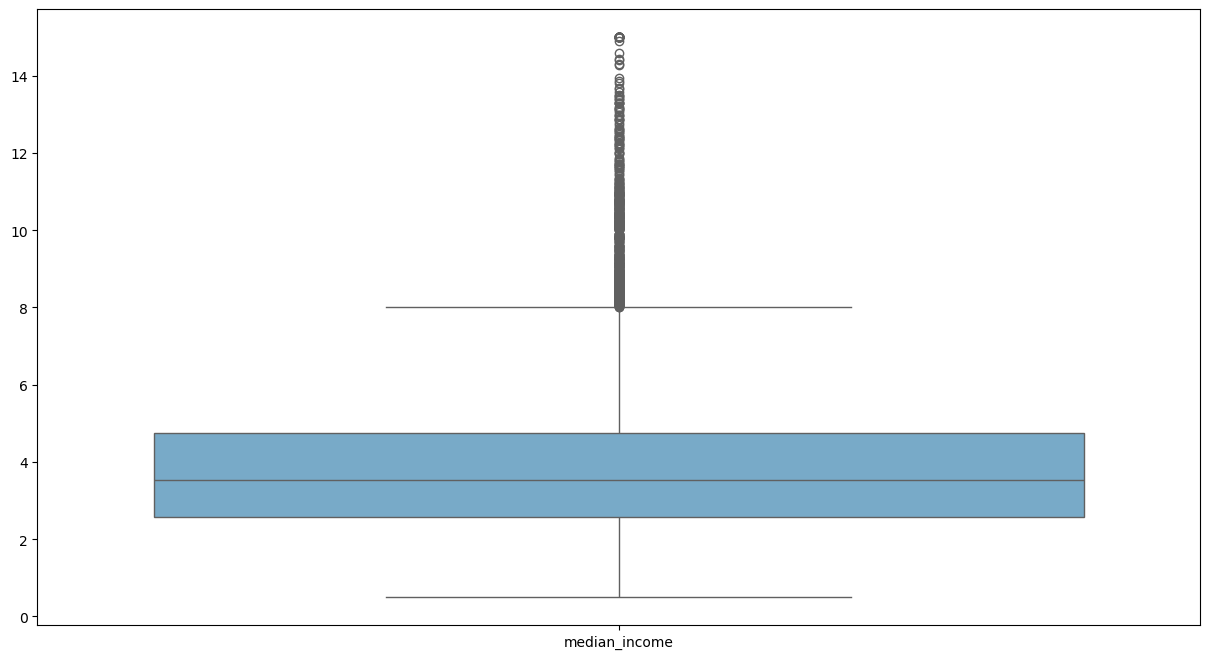

In [438]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['median_income']], palette="Blues")
plt.show()

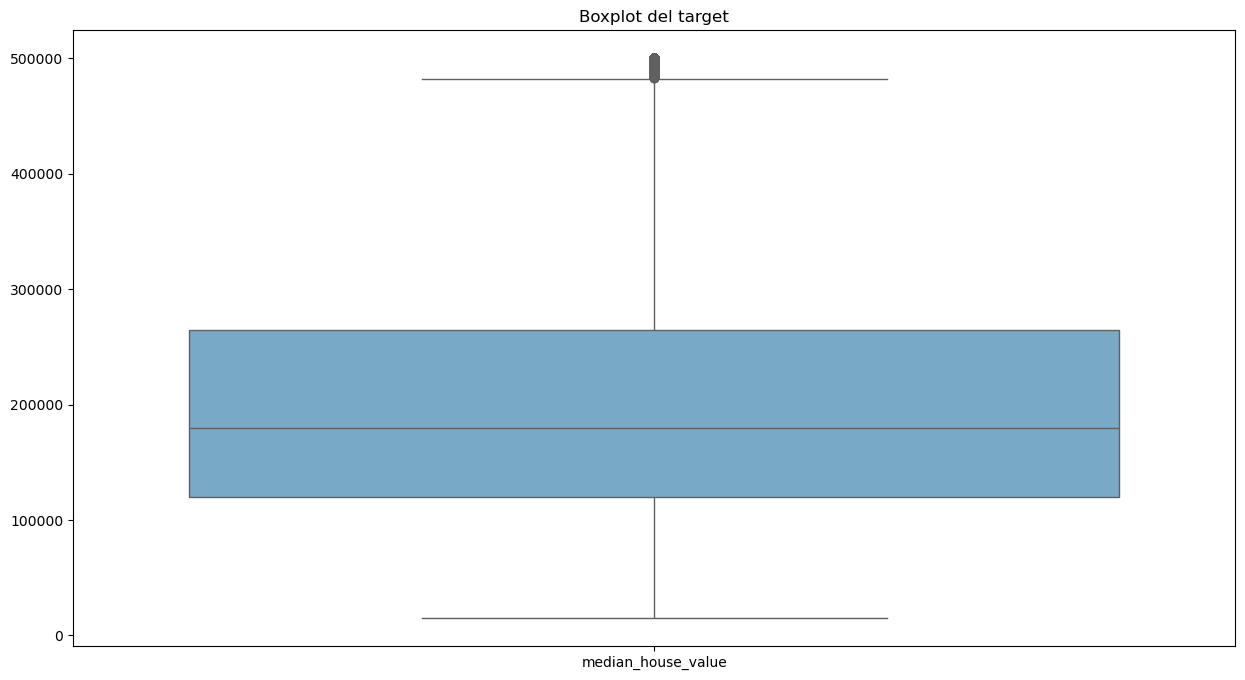

In [439]:
# Boxplot del target
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['median_house_value']],  palette="Blues")
plt.title('Boxplot del target')
plt.show()

### <font color= ##28af2e>Distribución de datos</font>

In [440]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [441]:
numericas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 'households', 'median_income']

categ = ['<1H_OCEAN', 'INLAND', 'NEAR_OCEAN', 'NEAR_BAY', 'ISLAND']

In [442]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

Podemos observar que la mayoría de features tienen una distribución casi normal, si no fuera por valores atípicos que nos jalan la cola casi siempre a la derecha, tienen sesgo positivo.

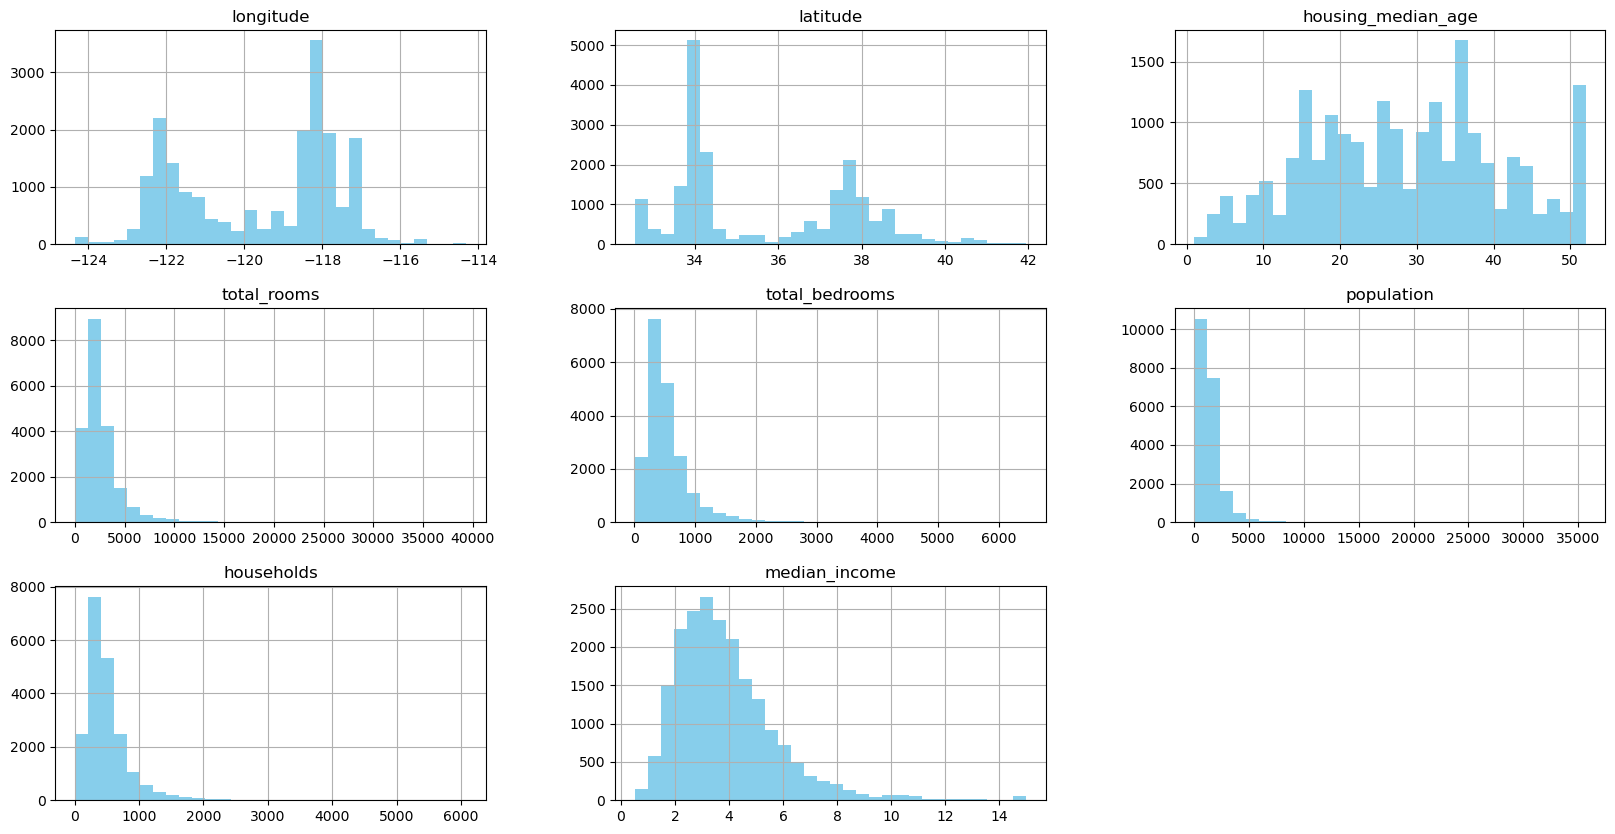

In [443]:
df[numericas].hist(bins = 30,figsize = (20,10), color='skyblue')
plt.show()

En la siguiente representación podemos ver cuantas zonas se encuentran en cada región

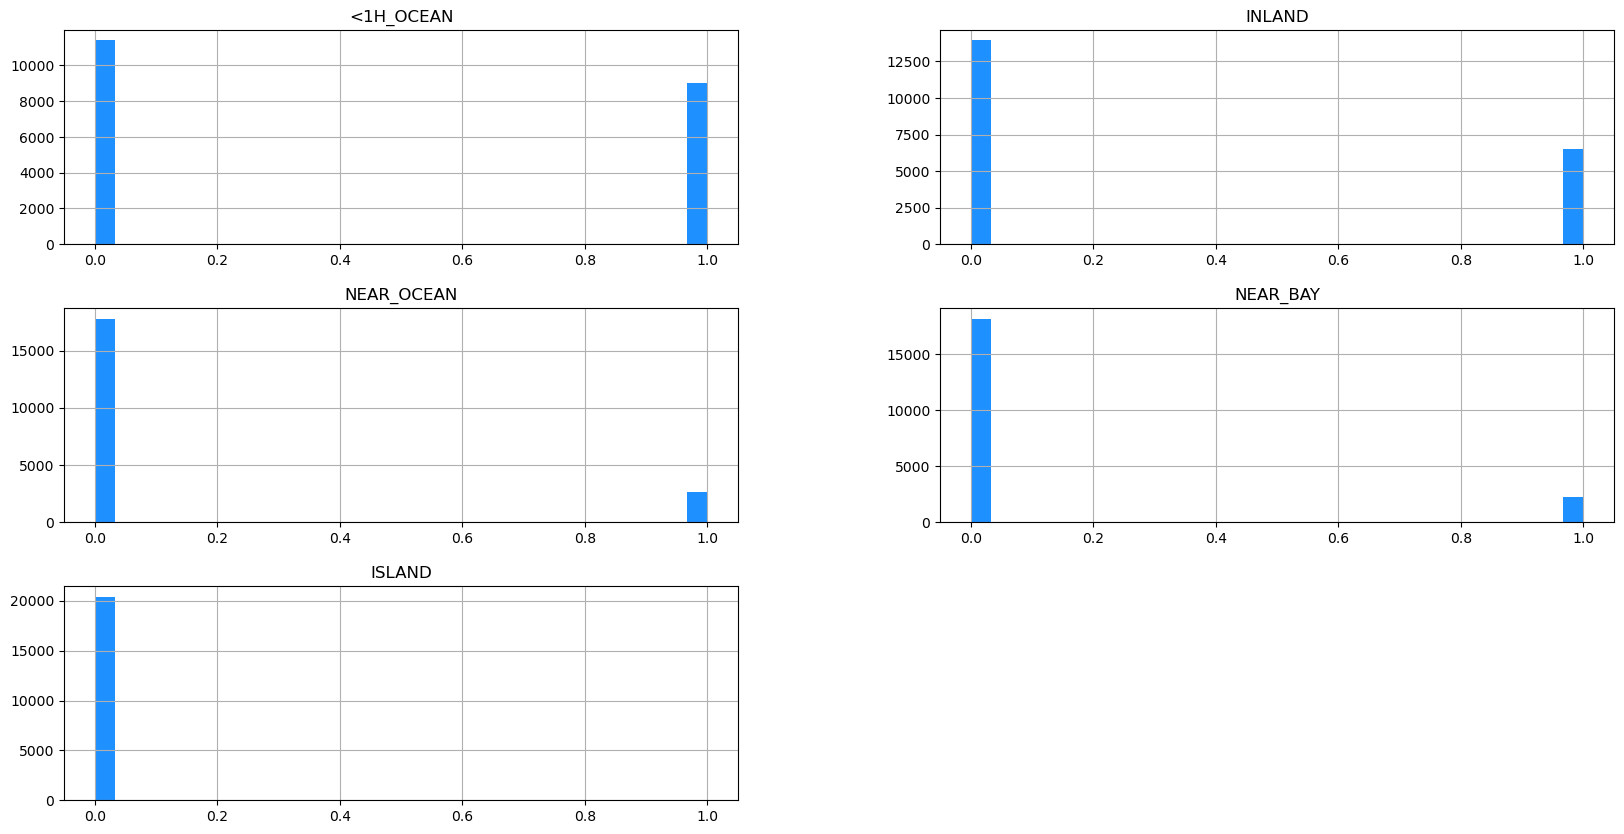

In [444]:
df[categ].hist(bins = 30,figsize = (20,10) , color='dodgerblue')
plt.show()

Finalmente vemos a continuación la distribución de nuestro target.

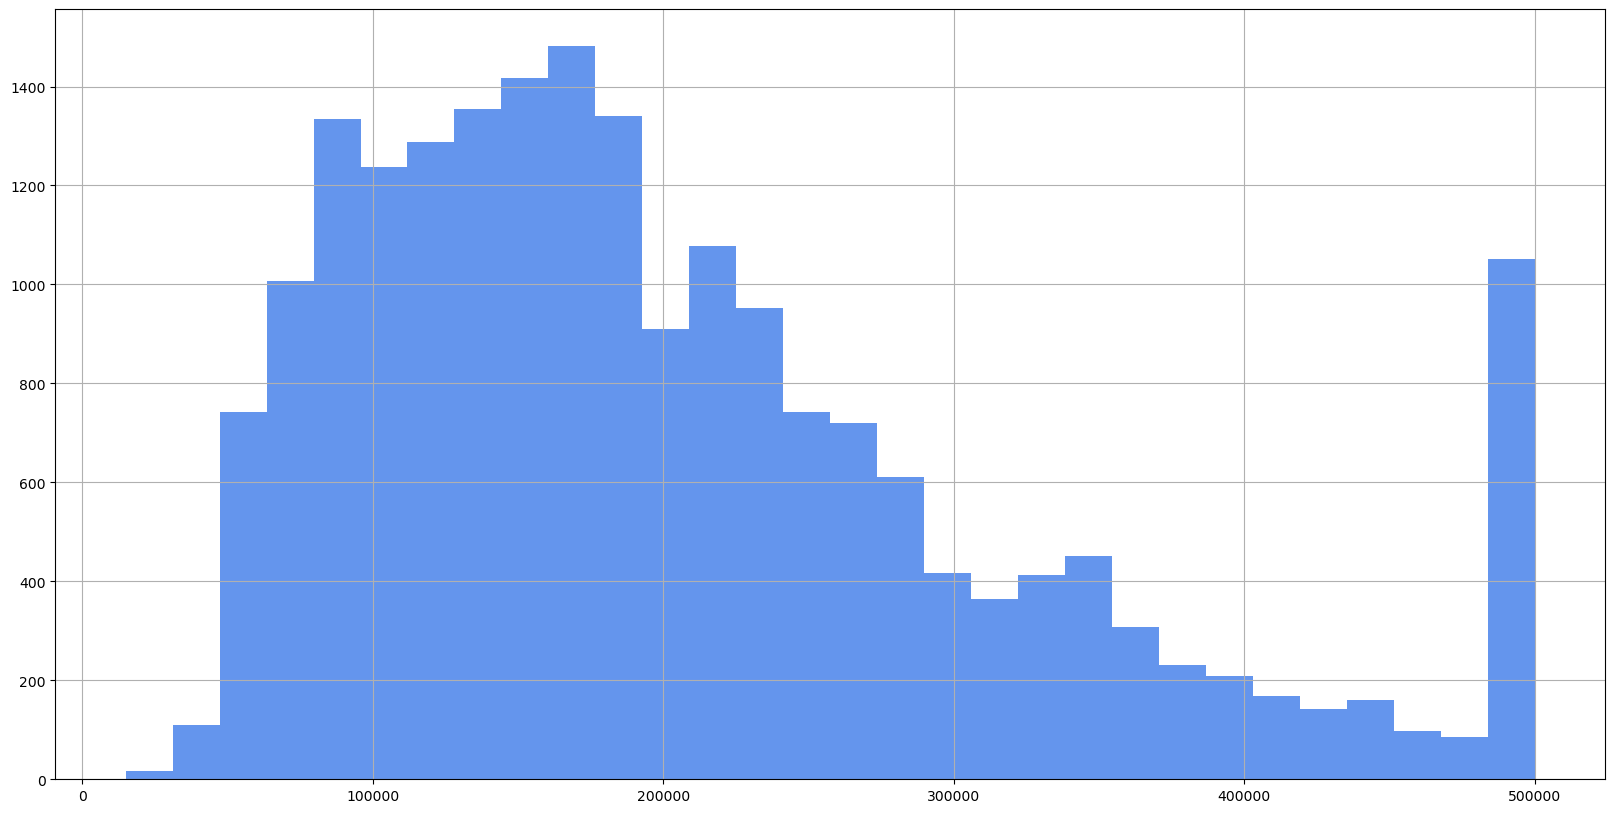

In [445]:
y.hist(bins = 30,figsize = (20,10), color = 'cornflowerblue')
plt.show()

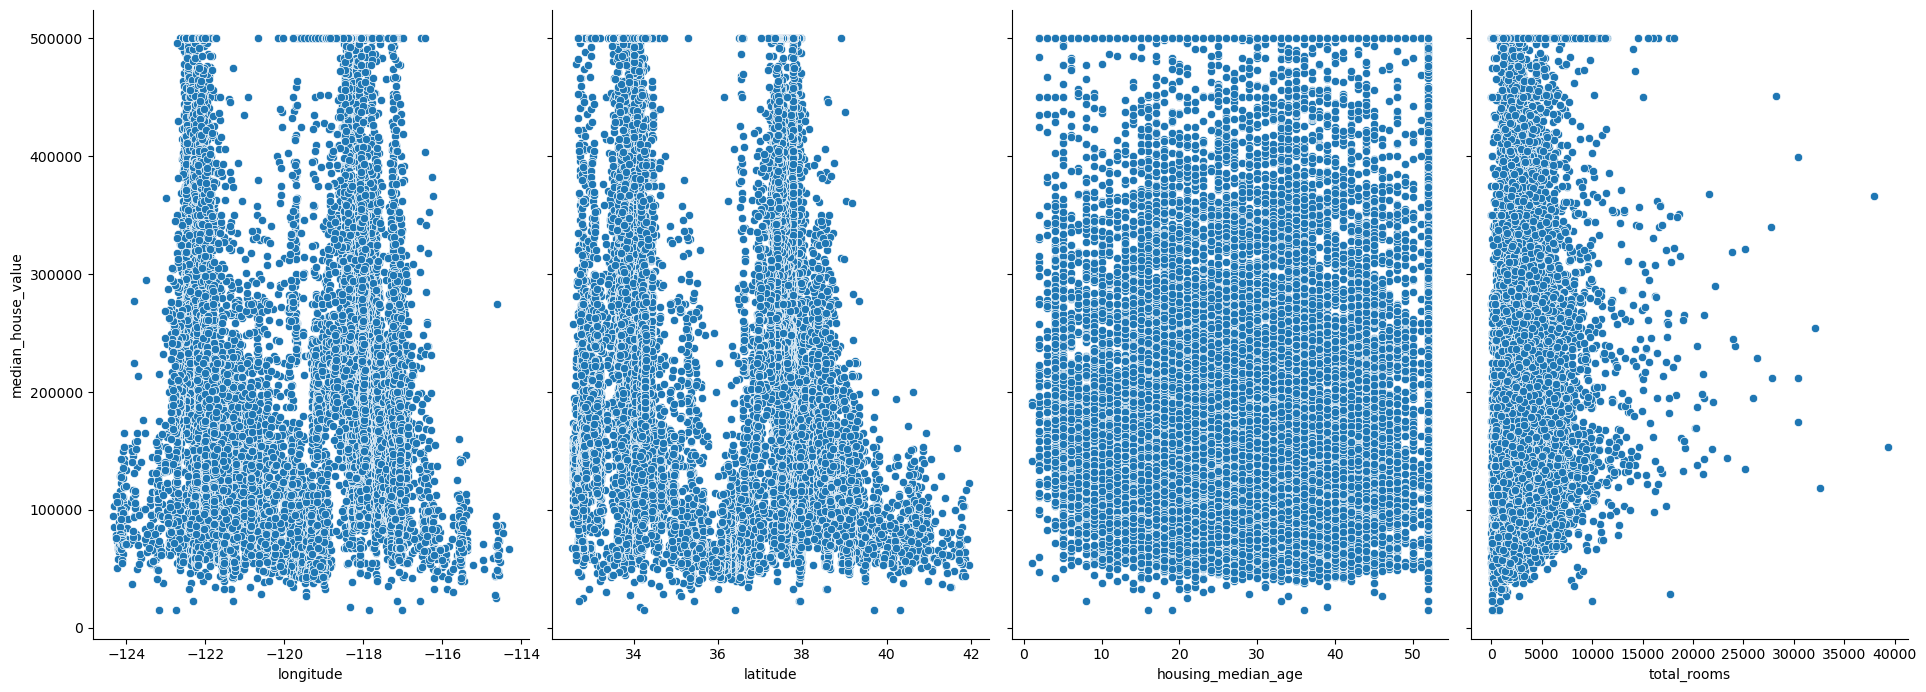

In [446]:
sns.pairplot(df, x_vars = numericas[:4], y_vars='median_house_value', height=7, aspect=0.7)
plt.show()

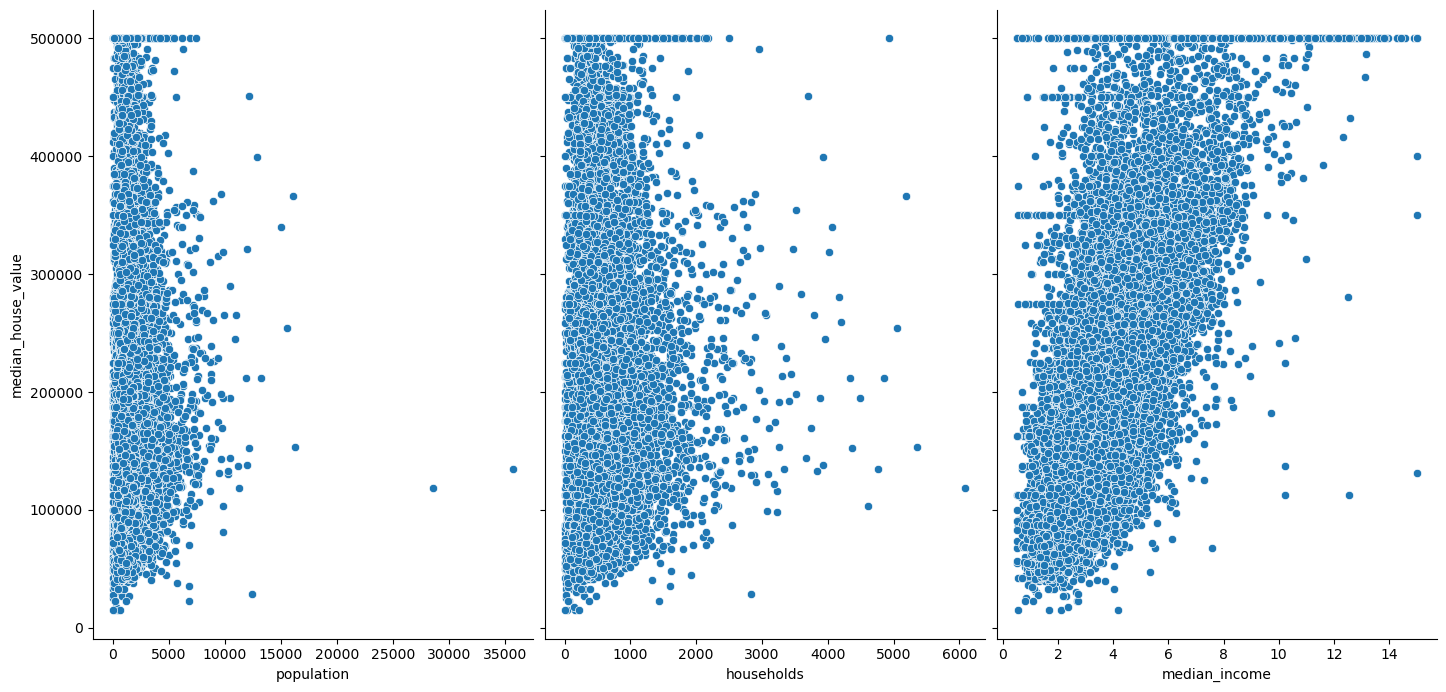

In [447]:
sns.pairplot(df, x_vars = numericas[5:], y_vars='median_house_value', height=7, aspect=0.7)
plt.show()

### <font color= ##28af2e> Train / Test </font>

In [448]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


In [449]:
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = X[categ])

print("Tamaño del X-train:", X_train0.shape)
print("Tamaño del X-test:", X_test0.shape)
print("Tamaño del y-train:", y_train.shape)
print("Tamaño del y-test:", y_test.shape)

Tamaño del X-train: (16346, 13)
Tamaño del X-test: (4087, 13)
Tamaño del y-train: (16346,)
Tamaño del y-test: (4087,)


In [450]:
pd.DataFrame(X_train0[categ].value_counts())

count
<1H_OCEAN INLAND NEAR_OCEAN NEAR_BAY ISLAND       
1         0      0          0        0        7227
0         1      0          0        0        5197
          0      1          0        0        2102
                 0          1        0        1816
                            0        1           4

In [451]:
pd.DataFrame(X_test0[categ].value_counts())

count
<1H_OCEAN INLAND NEAR_OCEAN NEAR_BAY ISLAND       
1         0      0          0        0        1807
0         1      0          0        0        1299
          0      1          0        0         526
                 0          1        0         454
                            0        1           1

In [452]:
from sklearn.linear_model import LinearRegression

## Regresion lineal

In [453]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train0)
X_test_scaled = scaler.transform(X_test0)

#Inicializamos el modelo
reg = LinearRegression()

#Entrenamos el modelo con los datos de entrenamiento
reg.fit(X_train_scaled,y_train)

#Predecimos con el modelo entrenado
y_pred = reg.predict(X_test_scaled)

### Linealidad

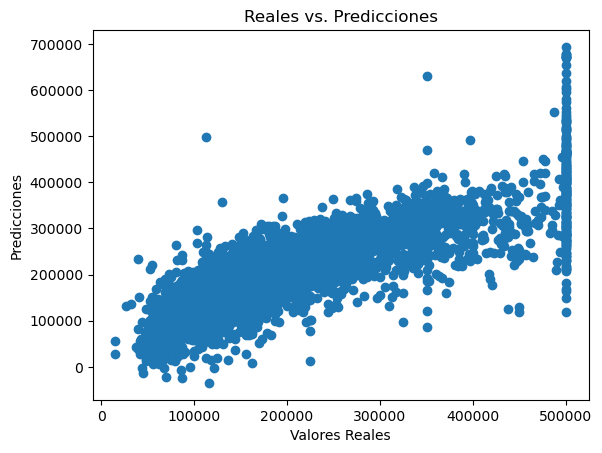

In [454]:
#graficamos las prediccions vs los valores reales
plt.scatter(x = y_test,y = y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Reales vs. Predicciones")
plt.show()

### Homoscedasticidad

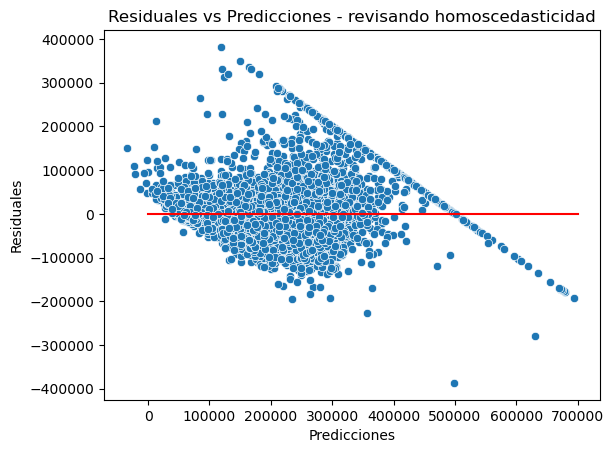

In [455]:
#buscamos patrones en los residuales. Si no hay patrones y están de forma aleatoria graficados entonces es bueno
residuales = y_test - y_pred
p = sns.scatterplot(x=y_pred, y=residuales)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
p = sns.lineplot(x=[0,700000],y=[0,0],color='red')
p = plt.title('Residuales vs Predicciones - revisando homoscedasticidad')

### Normalidad de los residuales

In [456]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


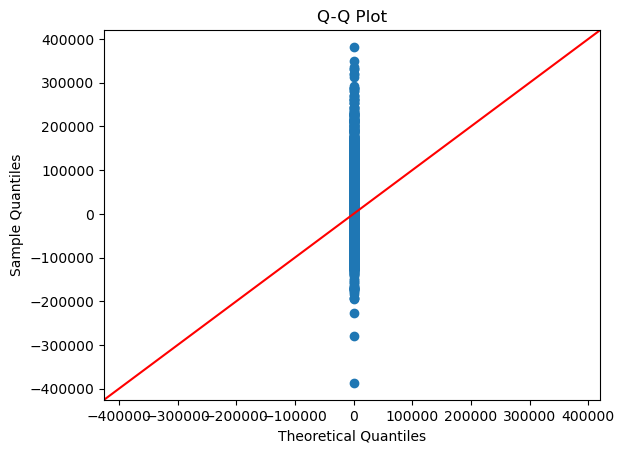

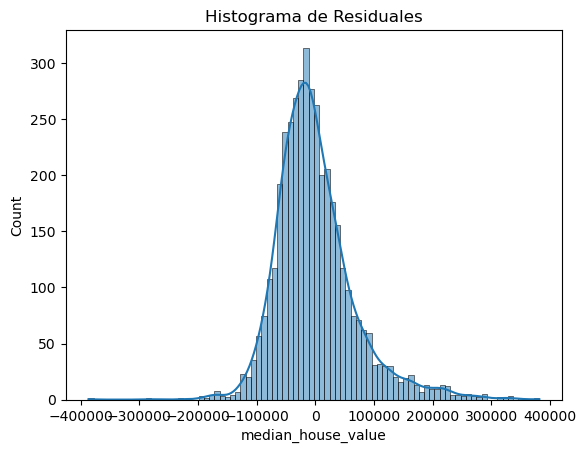

Shapiro-Wilk Test p-value: 4.09153992497263e-40


In [457]:
import statsmodels.api as sm
import scipy.stats as stats

sm.qqplot(residuales, line='45')
plt.title("Q-Q Plot")
plt.show()

# Alternativamente, usamos un histograma
sns.histplot(residuales, kde=True)
plt.title("Histograma de Residuales")
plt.show()

# Shapiro-Wilk test para la normalidad
shapiro_test = stats.shapiro(residuales)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

### No multicolinealidad

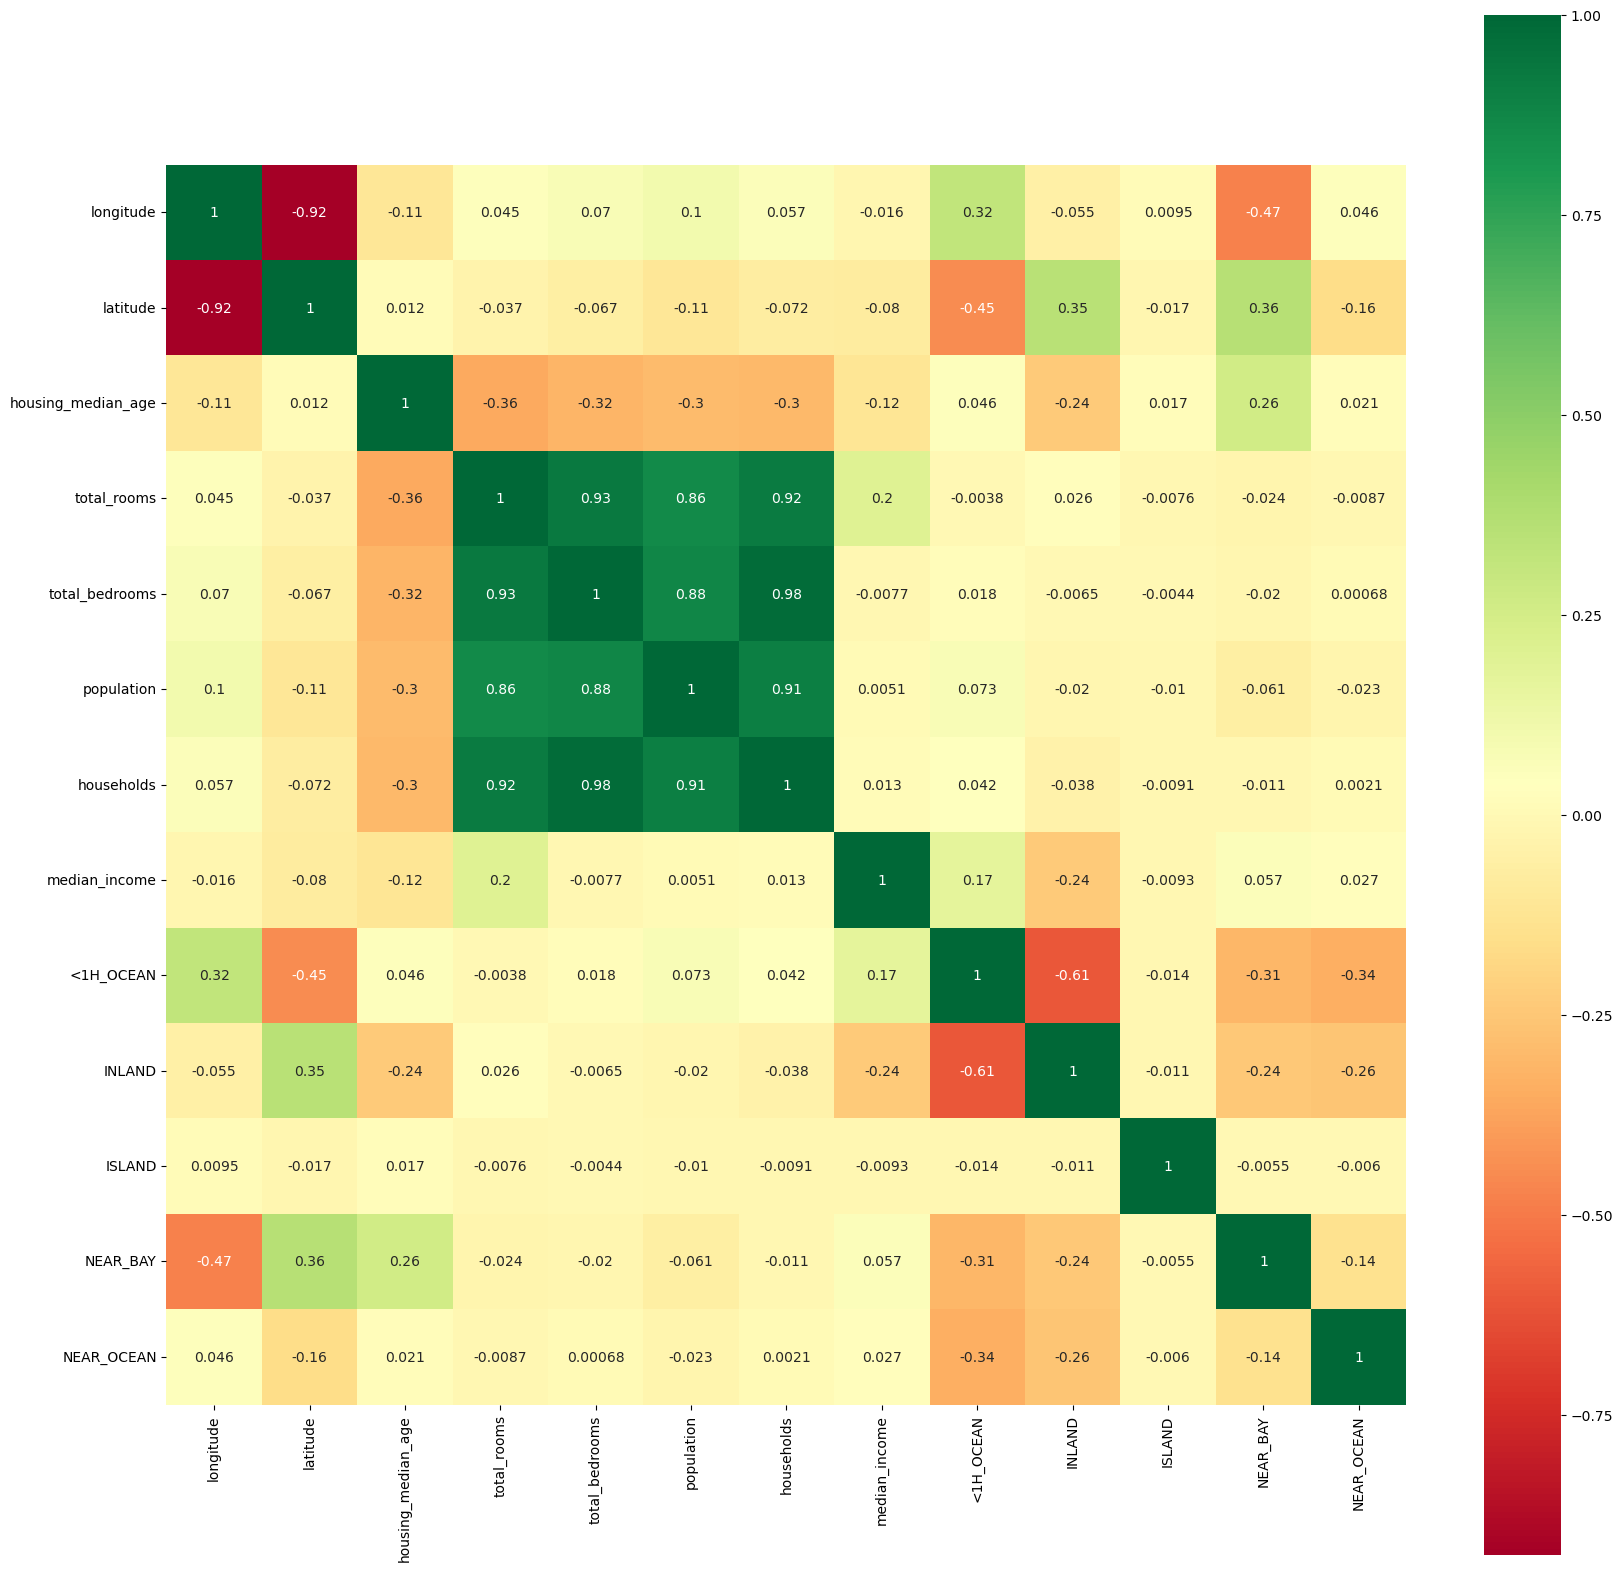

In [458]:
plt.figure(figsize=(20,20))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',square=True)

In [459]:
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R^2: 0.6632966232616178
Mean Squared Error: 4514350023.000343


## Regresion lineal con variables especificas

In [460]:
def calcDrop(res):

    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    

    poss_drop = list(set(res['drop'].tolist()))


    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop


def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    

    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X)
print(drop)

['total_rooms', 'latitude', '<1H_OCEAN', 'households', 'population']


C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\2723582919.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\2723582919.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


In [461]:
X_train0 = X_train0.drop(drop, axis = 1)
X_test0 = X_test0.drop(drop, axis = 1)

In [462]:
X_train0.head()

,longitude,housing_median_age,total_bedrooms,median_income,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
886,-121.98,17,1375.0,3.1326,0,0,0,0
8648,-118.40,45,505.0,5.3816,0,0,0,0
7434,-118.21,41,442.0,2.8400,0,0,0,0
17581,-121.92,34,150.0,5.2769,0,0,0,0
5954,-117.86,40,280.0,2.5880,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR_BAY'}>,
        <Axes: title={'center': 'NEAR_OCEAN'}>, <Axes: >]], dtype=object)

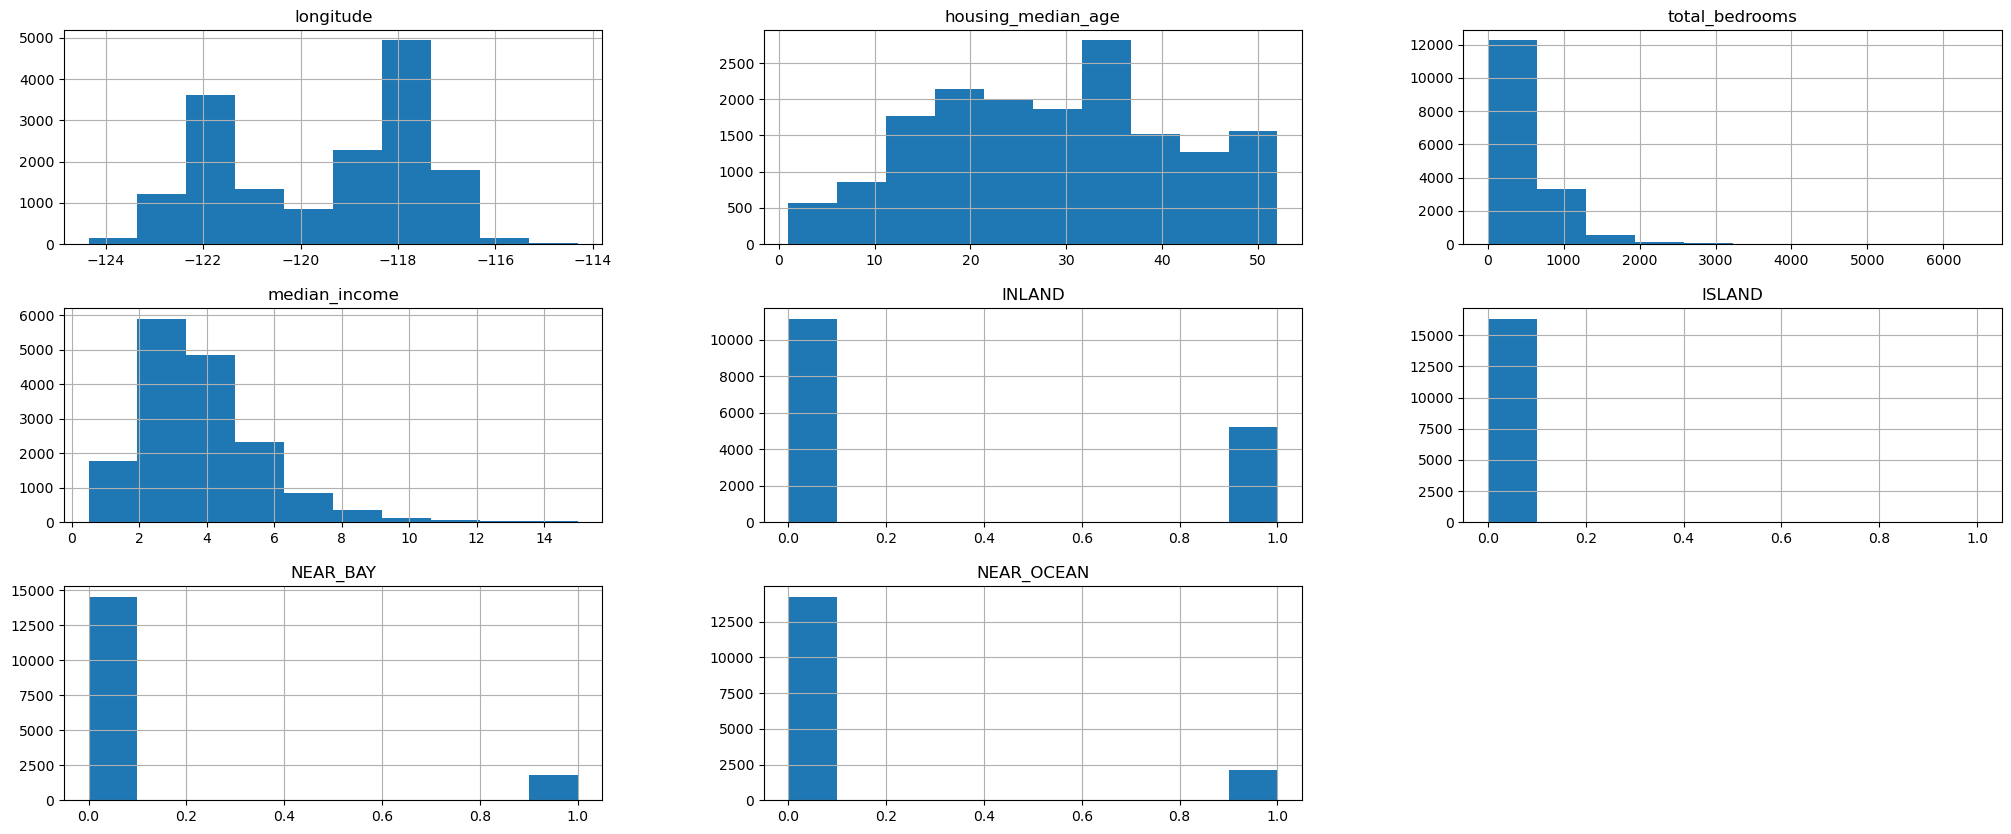

In [463]:
X_train0.hist(figsize=(25, 10))

### Box-Cox

C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\256238903.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, hist = False, kde = True,
c:\Users\esteb\anaconda3\envs\tsflow\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\256238903.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

Lambda value used for Transformation: 0.2273254366479361


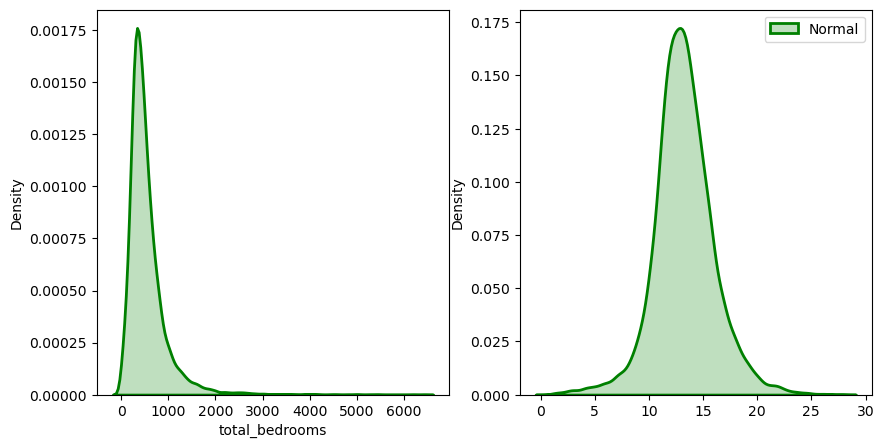

In [464]:
# Box Cox
# generate non-normal data (exponential)
original_data = X_train0['total_bedrooms']
 
# transform training data & save lambda value
fitted_data, fitted_lambda1 = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda1}")

In [465]:
X_train0['total_bedrooms'] = pd.DataFrame(fitted_data)

C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\1988935919.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, hist = False, kde = True,
c:\Users\esteb\anaconda3\envs\tsflow\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\esteb\AppData\Local\Temp\ipykernel_14936\1988935919.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to

Lambda value used for Transformation: 0.08730920205125159


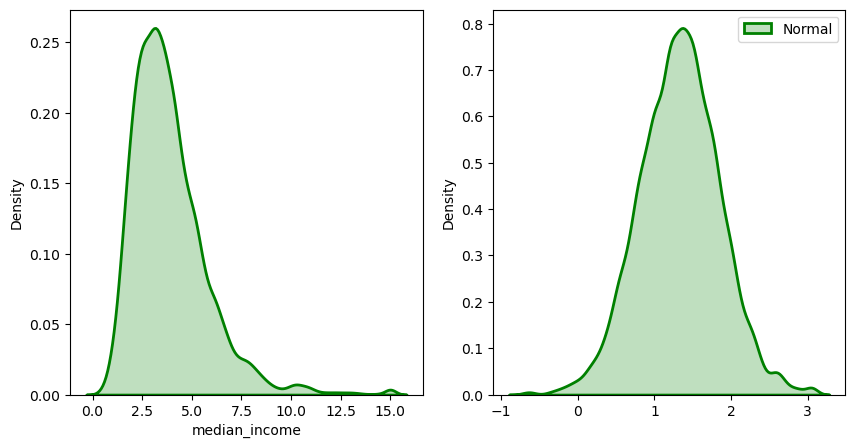

In [466]:
original_data = X_train0['median_income']
 
fitted_data, fitted_lambda2 = stats.boxcox(original_data)
 
fig, ax = plt.subplots(1, 2)

sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda2}")

In [467]:
X_train0['median_income'] = pd.DataFrame(fitted_data)

In [468]:
def boxcox_with_lambda(data, lambda_value):

    if lambda_value == 0:
        return np.log(data) 
    else:
        return (np.power(data, lambda_value) - 1) / lambda_value

In [469]:
original_data1 = X_test0['total_bedrooms']
original_data2 = X_test0['median_income']

transformed_data1 = boxcox_with_lambda(original_data1, fitted_lambda1)
transformed_data2 = boxcox_with_lambda(original_data2, fitted_lambda2)

X_test0['total_bedrooms'] = pd.DataFrame(transformed_data1)
X_test0['median_income'] = pd.DataFrame(transformed_data2)

X_test0.head()

,longitude,housing_median_age,total_bedrooms,median_income,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
16657,-120.66,17,14.353972,1.396154,0,0,0,1
3394,-118.30,43,11.807991,1.354998,0,0,0,0
6372,-118.01,52,13.433305,1.448741,1,0,0,0
13102,-121.35,2,17.356514,1.578569,1,0,0,0
6075,-117.87,33,15.205093,1.859389,0,0,0,0


In [470]:
columns_to_scale = ['longitude', 'housing_median_age', 'median_income', 'total_bedrooms']

variablesm = ['INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']

scaled_train = scaler.fit_transform(X_train0[columns_to_scale])
scaled_test = scaler.transform(X_test0[columns_to_scale])

scaled_train_df = pd.DataFrame(scaled_train, columns=columns_to_scale, index=X_train0.index)
scaled_test_df = pd.DataFrame(scaled_test, columns=columns_to_scale, index=X_test0.index)

X_train_scaled1 = X_train0.copy()
X_test_scaled1 = X_test0.copy()

X_train_scaled1[columns_to_scale] = scaled_train_df
X_test_scaled1[columns_to_scale] = scaled_test_df

In [471]:
X_train_scaled1['target'] = y_train

In [472]:
X_train_scaled1 = X_train_scaled1.dropna(axis = 0)

In [473]:
X_train_scaled1.isna().sum()

longitude             0
housing_median_age    0
total_bedrooms        0
median_income         0
INLAND                0
ISLAND                0
NEAR_BAY              0
NEAR_OCEAN            0
target                0
dtype: int64

In [476]:
y_train = X_train_scaled1['target']
X_train_scaled1 = X_train_scaled1.drop(['target'], axis = 1)


In [478]:
#Entrenamos el modelo con los datos de entrenamiento
reg.fit(X_train_scaled1,y_train)

#Predecimos con el modelo entrenado
y_pred = reg.predict(X_test_scaled1)

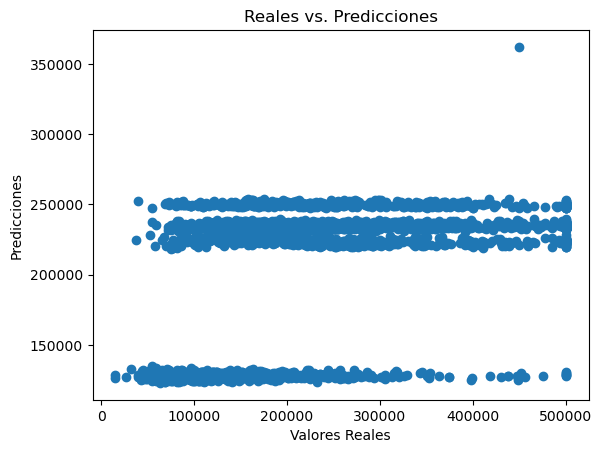

In [479]:
#graficamos las prediccions vs los valores reales
plt.scatter(x = y_test,y = y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Reales vs. Predicciones")
plt.show()

In [480]:
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R^2: 0.23657822752816937
Mean Squared Error: 10235576279.340317
